# Fitting Data

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
plt.style.use('ggplot')

---
## Fitting Data

In [3]:
my_data1 = pd.read_csv('./Data/fit_data1.csv')
my_data1.head(1)

,x,y
0,0.4,-4.288741


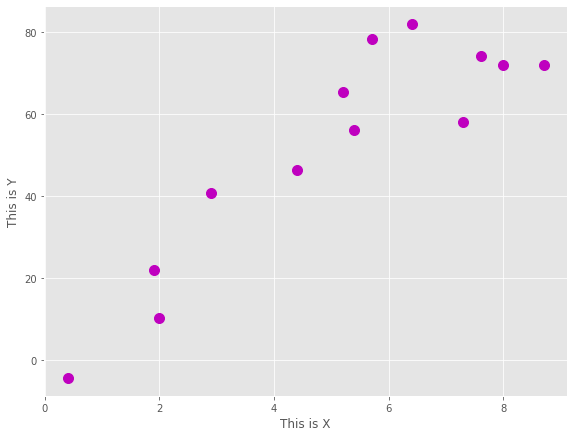

In [4]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)
fig.tight_layout()

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_data1['x'],my_data1['y'],
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10);

---

## `np.polyfit(x-data array, y-data array, order-of-fit)`

### First-order fitting:  $f(x) = ax + b$

In [5]:
my_fit1 = np.polyfit(my_data1['x'], my_data1['y'], 1)

my_fit1       # The coefficients of the fit (a,b)

array([9.4650469, 3.8158527])

### You can use `np.poly1d(fit-parameters)` to plot and explore the fitted polynomial

In [6]:
fitted_polynomial = np.poly1d(my_fit1)
fitted_polynomial

poly1d([9.4650469, 3.8158527])

In [9]:
my_data1['Fit'] = fitted_polynomial(my_data1['x'])

In [8]:
my_data1.head(1)

,x,y,Fit
0,0.4,-4.288741,7.601871


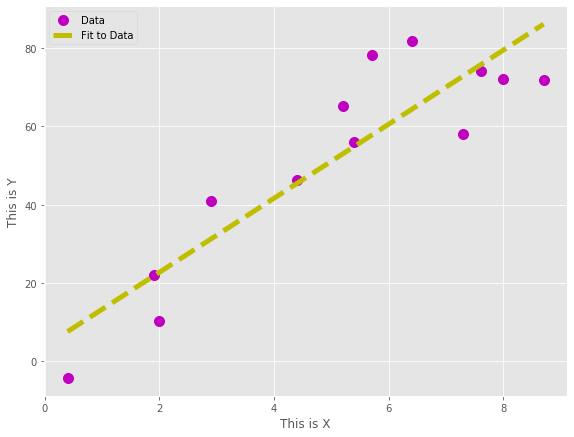

In [10]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

fig.tight_layout()

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_data1['x'], my_data1['y'],
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Data")

ax.plot(my_data1['x'], my_data1['Fit'],
        marker = "None",
        linewidth = 5,
        color = 'y',
        linestyle = '--',
        label = "Fit to Data")

ax.legend(loc=0);

In [11]:
fitted_polynomial(5)                 # value of f(x) at x = 5

51.1410872008009

In [12]:
fitted_polynomial.roots              # value of x at f(x) = 0

array([-0.40315201])

In [13]:
(fitted_polynomial - 40).roots       # value of x at f(x) = 40

array([3.82292319])

---
### Second-order fitting:  $f(x) = ax^2 + bx + c$

In [14]:
my_data2 = pd.read_csv('./Data/fit_data2.csv')

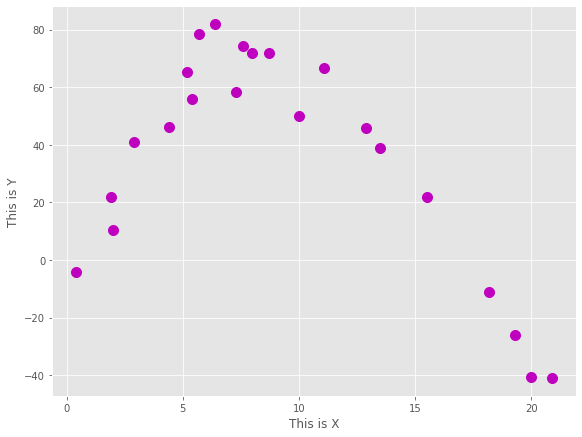

In [15]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

fig.tight_layout()

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_data2['x'],my_data2['y'],
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10);

In [16]:
my_fit2 = np.polyfit(my_data2['x'], my_data2['y'], 2)

my_fit2

array([-0.87495323, 15.67578454, -2.22790887])

In [17]:
fitted_polynomial = np.poly1d(my_fit2)

In [18]:
my_data2['Fit'] = fitted_polynomial(my_data2['x'])

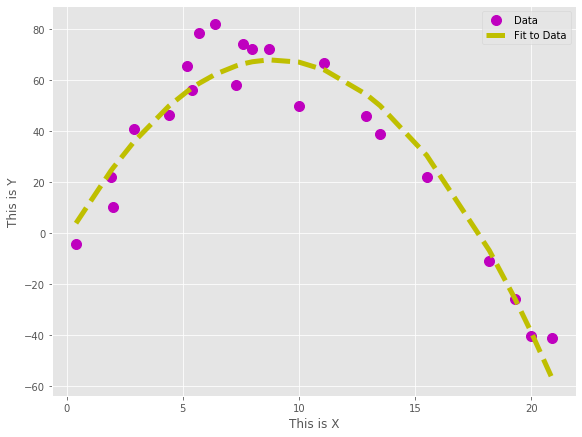

In [19]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

fig.tight_layout()

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_data2['x'], my_data2['y'],
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Data")

ax.plot(my_data2['x'], my_data2['Fit'],
        marker = "None",
        linewidth = 5,
        color ='y',
        linestyle = '--',
        label = "Fit to Data")

ax.legend(loc=0);

In [20]:
fitted_polynomial(5)                 # value of f(x) at x = 5

54.27718300980444

In [21]:
fitted_polynomial.roots              # value of x at f(x) = 0

array([17.77286999,  0.14326992])

In [22]:
(fitted_polynomial - 20).roots       # value of x at f(x) = 20

array([16.36363104,  1.55250886])

In [23]:
(fitted_polynomial - 80).roots       # value of x at f(x) = 80, no real root

array([8.95806995+3.7057737j, 8.95806995-3.7057737j])

---

### Side Topic - Complex Numbers

* Python uses `j` for the imaginary  part of a complex number
* `numpy` has *some* support for complex numbers

In [24]:
my_solutions = np.array([3.2 + 2.7j, 3.3j, 2.6 + 0j, 6.9])

In [25]:
my_solutions

array([3.2+2.7j, 0. +3.3j, 2.6+0.j , 6.9+0.j ])

In [26]:
np.isreal(my_solutions)

array([False, False,  True,  True])

In [27]:
np.iscomplex(my_solutions)

array([ True,  True, False, False])

### Remember: A complex root cannot be the solution to a **real world** problem.

* Except for the infinite number of exceptions
* You know what I mean ....

---

### Be careful! Very high-order fits (are almost always) garbage

In [39]:
my_fit3 = np.polyfit(my_data1['x'], my_data1['y'], 200)

fitted_polynomial = np.poly1d(my_fit3)

/home/tw94/miniconda3/lib/python3.7/site-packages/numpy/lib/polynomial.py:629: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/tw94/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


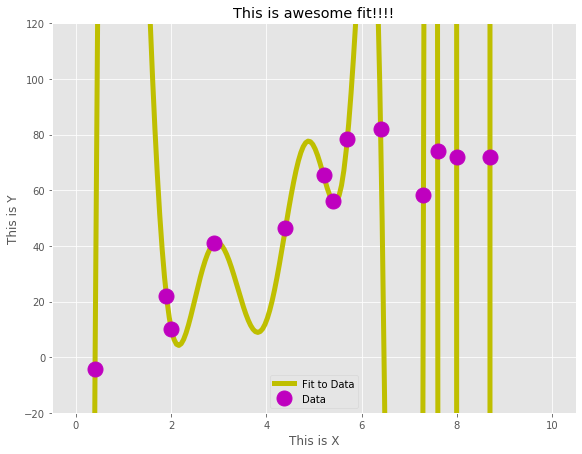

In [40]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(8,6)

fig.tight_layout()

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")
ax.set_title("This is awesome fit!!!!")

ax.set_ylim(-20,120)

xx = np.linspace(0,10,200)

ax.plot(xx, fitted_polynomial(xx),
        linewidth = 5,
        color = 'y',
        linestyle = '-',
        label = "Fit to Data")

ax.plot(my_data1['x'], my_data1['y'],
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 15,
        label = "Data")

ax.legend(loc=0);

---

### Side Topic - The unpack operator (**\***)

 * The unpacking operator takes a list and unpacks each value and sends each, in order.
 * It makes a list **iterable**

In [30]:
my_list = np.array([3.1, 5.6, 11.5, 19.6])

In [31]:
def some_numbers(a, b, c, d):
    my_string = f"I have four numbers: {a}, {b}, {c}, and {d}"
    print(my_string)

##### This will **not** work as the list (`my_list`) is sent as one blob:

In [32]:
some_numbers(my_list)

TypeError: some_numbers() missing 3 required positional arguments: 'b', 'c', and 'd'

##### This **will** work as the list (`*my_list`) is unpacked and sent as 4 pieces:

In [33]:
some_numbers(*my_list)

I have four numbers: 3.1, 5.6, 11.5, and 19.6


---

# Fitting a specific function - `curve_fit`

In [34]:
from scipy.optimize import curve_fit

In [35]:
my_data3 = pd.read_csv('./Data/fit_data3.csv')

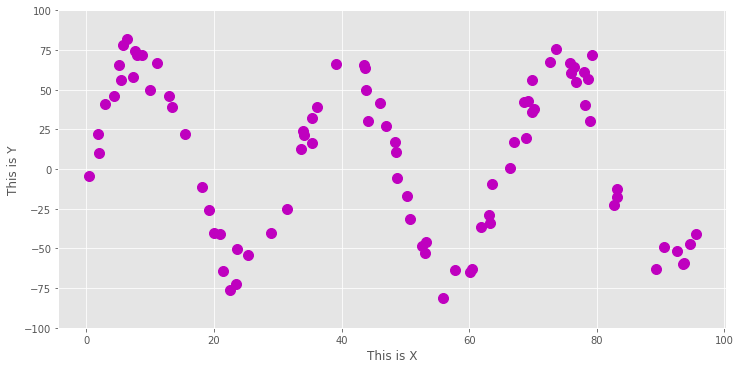

In [36]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)

fig.tight_layout()

ax.set_ylim(-100,100)

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_data3['x'], my_data3['y'],
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10);

$$ \Large f(x) = a \sin(bx) $$

#### You need to provide f(x)

* The first argument needs to be the points to fit (`x`)
* The other arguments are the parameters to be fit (`a,b`)
* The function just returns: `f(x)`

In [37]:
def ringo(x,a,b):
    return a*np.sin(b*x)

##### You need to provide an initial guess to the parameters `a` and `b`

In [38]:
my_guess_a = 75.0
my_guess_b = 1.0/5.0

init_guesses = [my_guess_a, my_guess_b]

#### My Parameters:

* `Function to fit = ringo`
* `X points to fit = my_data3['x']`
* `Y points to fit = my_data3['y']`
* `Initial guess (`p0`) at values for a,b = init_guesses`

In [41]:
fitpars, error = curve_fit(ringo,
                           my_data3['x'], my_data3['y'],
                           p0 = init_guesses)

print(fitpars)

[68.14778865  0.1911845 ]


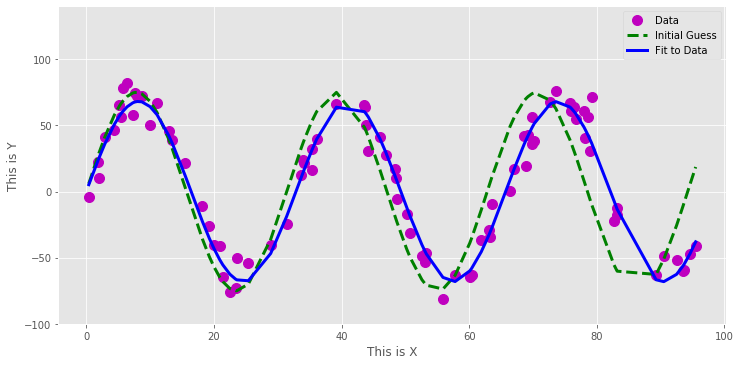

In [42]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)
fig.tight_layout()

ax.set_ylim(-100,140)

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_data3['x'], my_data3['y'],
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Data")

ax.plot(my_data3['x'], ringo(my_data3['x'], *init_guesses),
        color = "g",
        marker = "None",
        linestyle = "--",
        linewidth = 3,
        label = "Initial Guess")

ax.plot(my_data3['x'], ringo(my_data3['x'], *fitpars),
        color = "b",
        marker = "None",
        linestyle = "-",
        linewidth = 3,
        label = "Fit to Data")

ax.legend(loc=0);

### Bad initial guesses can lead to very bad fits

In [43]:
my_guess_a = 35.0
my_guess_b = 1.0

init_guesses = [my_guess_a, my_guess_b]

In [44]:
fitpars, error = curve_fit(ringo,
                           my_data3['x'], my_data3['y'],
                           p0=init_guesses)

print(fitpars)

[4.55024387 0.99176996]


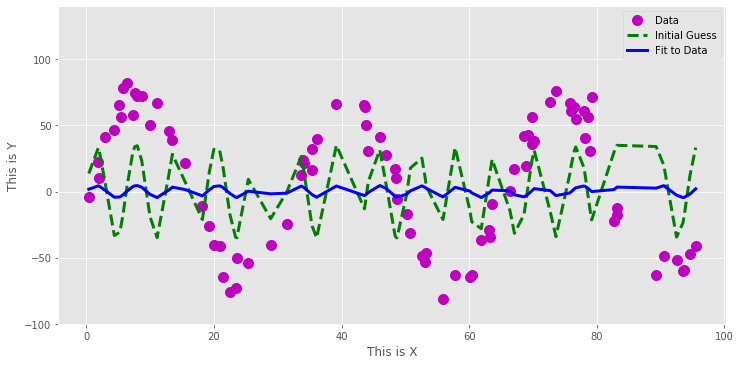

In [45]:
fig,ax = plt.subplots(1,1)
fig.set_size_inches(10,5)
fig.tight_layout()

ax.set_ylim(-100,140)

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(my_data3['x'], my_data3['y'],
        color = "m",
        marker = "o",
        linestyle = "None",
        markersize = 10,
        label = "Data")

ax.plot(my_data3['x'], ringo(my_data3['x'], *init_guesses),
        color = "g",
        marker = "None",
        linestyle = "--",
        linewidth = 3,
        label = "Initial Guess")

ax.plot(my_data3['x'], ringo(my_data3['x'], *fitpars),
        color = "b",
        marker = "None",
        linestyle = "-",
        linewidth = 3,
        label = "Fit to Data")

ax.legend(loc=0);

---

### Side Topic - Scaling data: Normalization

* It is often useful to rescale your data.
* One of the most common types of rescaling is called: `min-max normalization`.
* This method rescales that data so the range of the `y-data` is `[0->1]`

$$ \Large
\text{Normalized}(y)={\frac  {y-{\text{min}}(y)}{{\text{max}}(y)-{\text{min}}(y)}}
$$

In [46]:
def normalize_data(data_array):
    result = (data_array - data_array.min()) / (data_array.max() - data_array.min())
    return result

In [47]:
my_data3['y'].min(), my_data3['y'].max()

(-81.0370987333, 81.9306821863)

In [48]:
y_normal = normalize_data(my_data3['y'])

In [49]:
y_normal.min(), y_normal.max()

(0.0, 1.0)

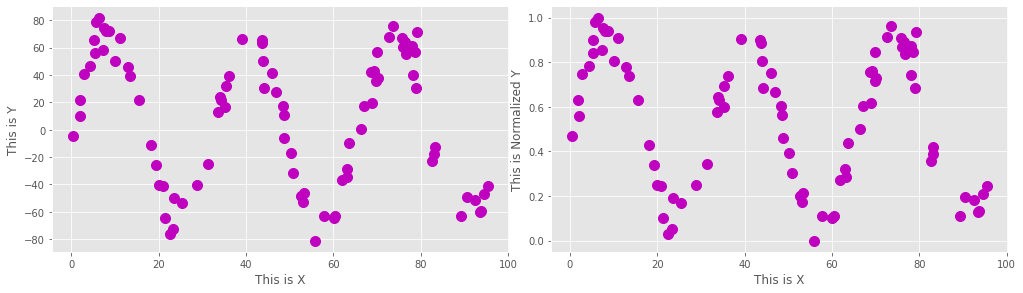

In [50]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(14,4)

fig.tight_layout()


ax[0].set_xlabel("This is X")
ax[0].set_ylabel("This is Y")

ax[0].plot(my_data3['x'], my_data3['y'],
           color = "m",
           marker = "o",
           linestyle = "None",
           markersize = 10)

ax[1].set_xlabel("This is X")
ax[1].set_ylabel("This is Normalized Y")

ax[1].plot(my_data3['x'], y_normal,
           color = "m",
           marker = "o",
           linestyle = "None",
           markersize = 10);

---
## This is a Test ....

In [51]:
from astroplan import download_IERS_A
download_IERS_A()